## 📋 Table of Contents

| Section | Description | Key Features |
|---------|-------------|--------------|
| **🛠️ [Setup](#setup)** | Environment and imports | Libraries, data loading |
| **🔍 [Data Overview](#data-overview)** | Initial data exploration | Basic statistics, quality check |
| **🔢 [Numerical Features](#numerical-features)** | Process continuous variables | Mileage, year, engine size, etc. |
| **📝 [Categorical Features](#categorical-features)** | Handle discrete variables | Brand, transmission, fuel type |
| **⚙️ [Feature Engineering](#feature-engineering)** | Create derived features | Age calculation, efficiency ratios |
| **🔄 [Complete Pipeline](#complete-pipeline)** | End-to-end processing | Full workflow demonstration |
| **📊 [Quality Assessment](#quality-assessment)** | Validation and reporting | Data quality metrics |
| **💾 [Pipeline Persistence](#pipeline-persistence)** | Save/load functionality | Production deployment |

---

# 🛠️ Setup and Configuration

## 📦 Import Libraries

We'll use our refactored preprocessing pipeline along with standard data science libraries.

In [1]:
# Core data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Machine learning utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# System and utility imports
import os
import json
from typing import Dict, Any, Optional, Union, Callable, List

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

In [17]:
# Change to project directory and load our custom preprocessor
os.chdir('/Users/leonardodicaterina/Documents/GitHub/ML_group_45')
from utils.preprocessing.Preprocessor_divided import DataPreprocessor

# Load datasets
train_data = pd.read_csv('Data/train.csv')
test_data = pd.read_csv('Data/test.csv')

print("Car Price Dataset Loaded Successfully!")
print("=" * 50)
print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")
print(f"Target variable: 'price'")
print(f"Price range: £{train_data['price'].min():,.0f} - £{train_data['price'].max():,.0f}")
print(f"Average price: £{train_data['price'].mean():,.0f}")

# Display first few rows
print("\nSample Data:")
display(train_data.head())

Car Price Dataset Loaded Successfully!
Training data shape: (75973, 14)
Test data shape: (32567, 13)
Target variable: 'price'
Price range: £450 - £159,999
Average price: £16,882

Sample Data:


,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


---

# Results Assessment and Validation

## Data Quality Report

Let's evaluate the effectiveness of our preprocessing pipeline and ensure data quality for machine learning

In [3]:
def data_quality_overview(df, dataset_name="Dataset"):
    """Comprehensive data quality assessment"""
    
    print(f"\n {dataset_name.upper()} QUALITY ASSESSMENT")
    print("=" * 60)
    
    # Basic info
    print(f" Shape: {df.shape}")
    print(f" Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Missing values analysis
    missing_summary = df.isnull().sum()
    missing_pct = (missing_summary / len(df)) * 100
    
    print("\n Missing Values Summary:")
    missing_df = pd.DataFrame({
        'Missing Count': missing_summary,
        'Missing %': missing_pct
    }).round(2)
    
    missing_features = missing_df[missing_df['Missing Count'] > 0]
    if len(missing_features) > 0:
        display(missing_features)
    else:
        print(" No missing values detected!")
    
    # Data types
    print(f"\n Data Types:")
    dtype_summary = df.dtypes.value_counts()
    for dtype, count in dtype_summary.items():
        print(f"  {dtype}: {count} features")
    
    # Numerical features summary
    numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_features = df.select_dtypes(include=['object']).columns.tolist()
    
    print(f"\n Feature Categories:")
    print(f"   Numerical: {len(numeric_features)} features")
    print(f"   Categorical: {len(categorical_features)} features")
    
    return {
        'missing_summary': missing_df,
        'numeric_features': numeric_features,
        'categorical_features': categorical_features
    }

# Analyze our datasets
train_quality = data_quality_overview(train_data, "Training Data")
test_quality = data_quality_overview(test_data, "Test Data")


 TRAINING DATA QUALITY ASSESSMENT
 Shape: (75973, 14)
 Memory usage: 21.62 MB

 Missing Values Summary:


,Missing Count,Missing %
Brand,1521,2.00
model,1517,2.00
year,1491,1.96
transmission,1522,2.00
mileage,1463,1.93
fuelType,1511,1.99
tax,7904,10.40
mpg,7926,10.43
engineSize,1516,2.00
paintQuality%,1524,2.01



 Data Types:
  float64: 8 features
  object: 4 features
  int64: 2 features

 Feature Categories:
   Numerical: 10 features
   Categorical: 4 features

 TEST DATA QUALITY ASSESSMENT
 Shape: (32567, 13)
 Memory usage: 9.02 MB

 Missing Values Summary:


,Missing Count,Missing %
Brand,649,1.99
model,650,2.00
year,653,2.01
transmission,623,1.91
mileage,689,2.12
fuelType,656,2.01
tax,3308,10.16
mpg,3288,10.10
engineSize,628,1.93
paintQuality%,625,1.92



 Data Types:
  float64: 8 features
  object: 4 features
  int64: 1 features

 Feature Categories:
   Numerical: 9 features
   Categorical: 4 features


---

# Individual Feature Processing Showcase

This section demonstrates how to process each type of feature using our modular preprocessing pipeline. Each feature type has specific considerations and optimal processing strategies

## Numerical Features Processing

Numerical features in car data often have unique characteristics that require domain-specific handling

In [4]:
def log_transform(x):
    """Enhanced log transformation with safety checks"""
    return np.log1p(np.abs(x))

def year_to_age(year_series):
    """Convert manufacturing year to vehicle age"""
    current_year = 2025
    return current_year - year_series

def clean_engine_size(engine_series):
    """Standardize engine size units to cubic centimeters"""
    cleaned = np.abs(engine_series)
    # Convert engines < 10 from liters to cc (multiply by 1000)
    cleaned = cleaned.apply(lambda x: x * 1000 if x < 10 else x)
    return cleaned

def clip_percentage(x, min_val=0, max_val=100):
    """Clip percentage values to valid range"""
    return x.apply(lambda val: max(min_val, min(max_val, val)))

def transform_owners(x):
    """Transform previous owners count with log scaling"""
    return np.log1p(np.abs(np.floor(x)))

In [5]:
# Configure basic cleaning for individual features
basic_configs = {
    'mileage': {
        'fill_na': 'median',
        'transform': log_transform,
        'outlier_method': 'iqr',
        'outlier_action': 'clip'
    },
    'year': {
        'fill_na': 'mean',
        'transform': year_to_age,  # Convert to car age
        'outlier_method': 'zscore',
        'zscore_threshold': 2.5,
        'outlier_action': 'clip'
    },
    'engineSize': {
        'fill_na': 1600,  # 1.6L default in cc
        'transform': clean_engine_size,
    },
    'tax': {
        'fill_na': 'mean',
        'transform': np.abs,  # Handle negative tax values
    },
    'mpg': {
        'fill_na': 'mean', 
        'transform': log_transform,
    }
}

print("BASIC PREPROCESSING CONFIGURATION")
print("=" * 50)

for feature, config in basic_configs.items():
    print(f"\n🔧 {feature.upper()}:")
    for param, value in config.items():
        if callable(value):
            value_str = f"{value.__name__}()"
        else:
            value_str = str(value)
        print(f"   {param}: {value_str}")

print(f"\n Configured {len(basic_configs)} features for basic processing")

BASIC PREPROCESSING CONFIGURATION

🔧 MILEAGE:
   fill_na: median
   transform: log_transform()
   outlier_method: iqr
   outlier_action: clip

🔧 YEAR:
   fill_na: mean
   transform: year_to_age()
   outlier_method: zscore
   zscore_threshold: 2.5
   outlier_action: clip

🔧 ENGINESIZE:
   fill_na: 1600
   transform: clean_engine_size()

🔧 TAX:
   fill_na: mean
   transform: absolute()

🔧 MPG:
   fill_na: mean
   transform: log_transform()

 Configured 5 features for basic processing


In [ ]:
# Initialize and fit the basic preprocessor
print("APPLYING BASIC PREPROCESSING")
print("=" * 50)

basic_prepper = DataPreprocessor(target_column='price')

# Configure each feature individually using the basic_configs
for feature_name, config in basic_configs.items():
    basic_prepper.add_feature_pipeline(
        feature_name,
        missing_strategy=config.get('fill_na'),
        outlier_method=config.get('outlier_method'),
        outlier_action=config.get('outlier_action', 'clip'),
        transform_func=config.get('transform'),
        scaling_method=config.get('normalize')
    )

print("Fitting preprocessor on training data...")
basic_prepper.fit(train_data)

print("Transforming datasets...")
# Use transform() method instead of clean_data()
X_train_basic, y_train = basic_prepper.transform(train_data)
X_test_basic, _ = basic_prepper.transform(test_data)

# Results summary
print("\n BASIC PROCESSING RESULTS")
print("-" * 30)
print(f"Training shape: {X_train_basic.shape}")
print(f"Test shape: {X_test_basic.shape}")
print(f"Features processed: {list(basic_configs.keys())}")
print(f"Missing values remaining: {X_train_basic.isnull().sum().sum()}")

# Show before/after comparison for one feature
print(f"\n MILEAGE TRANSFORMATION EXAMPLE:")
original_stats = train_data['mileage'].describe()
processed_stats = X_train_basic['mileage'].describe()

comparison_df = pd.DataFrame({
    'Original': original_stats,
    'Processed': processed_stats
}).round(3)

display(comparison_df)

🚀 APPLYING BASIC PREPROCESSING
📚 Fitting preprocessor on training data...
✓ Fitting pipeline for 'mileage'
✓ Fitting pipeline for 'year'
✓ Fitting pipeline for 'engineSize'
✓ Fitting pipeline for 'tax'
✓ Fitting pipeline for 'mpg'
🔄 Transforming datasets...
✓ Transforming 'mileage'
✓ Transforming 'year'
✓ Transforming 'engineSize'
✓ Transforming 'tax'
✓ Transforming 'mpg'
✓ Transforming 'mileage'
✓ Transforming 'year'
✓ Transforming 'engineSize'
✓ Transforming 'tax'
✓ Transforming 'mpg'

📊 BASIC PROCESSING RESULTS
------------------------------
✅ Training shape: (75973, 13)
✅ Test shape: (32567, 13)
✅ Features processed: ['mileage', 'year', 'engineSize', 'tax', 'mpg']
✅ Missing values remaining: 10693

📈 MILEAGE TRANSFORMATION EXAMPLE:


,Original,Processed
count,74510.000,75973.000
mean,23004.184,9.445
std,22129.788,1.508
min,-58540.574,0.693
25%,7423.250,8.964
50%,17300.000,9.759
75%,32427.500,10.374
max,323000.000,11.137


In [14]:
# Advanced configuration with feature engineering and encoding
advanced_configs = {
    # Enhanced numerical processing
    'mileage': {
        'fill_na': 'median',
        'transform': log_transform,
        'outlier_method': 'iqr',
        'outlier_action': 'clip',
        'normalize': 'standard'
    },
    'year': {
        'fill_na': 'mean',
        'transform': year_to_age,
        'outlier_method': 'zscore',
        'zscore_threshold': 2.5,
        'outlier_action': 'clip',
        'normalize': 'minmax'
    },
    'engineSize': {
        'fill_na': 1600,
        'transform': clean_engine_size,
        'normalize': 'robust'
    },
    'tax': {
        'fill_na': 'mean',
        'transform': np.abs,
        'normalize': 'standard'
    },
    'mpg': {
        'fill_na': 'mean',
        'transform': log_transform,
        'normalize': 'standard'
    },
    
    # Categorical encoding
    'transmission': {
        'fill_na': 'mode',
        'encode': 'onehot'
    },
    'fuelType': {
        'fill_na': 'mode',
        'encode': 'onehot'
    },
    'Brand': {
        'fill_na': 'mode',
        'encode': 'mean'  # Target encoding for high cardinality
    }
}

print("🚀 ADVANCED PREPROCESSING CONFIGURATION")
print("=" * 50)

# Categorize configurations
numerical_configs = {k: v for k, v in advanced_configs.items() 
                    if 'encode' not in v and 'parent_features' not in v}
categorical_configs = {k: v for k, v in advanced_configs.items() if 'encode' in v}

print(f"📊 Numerical features: {len(numerical_configs)}")
for feature in numerical_configs.keys():
    scaling = numerical_configs[feature].get('normalize', 'None')
    print(f"   • {feature} → {scaling} scaling")

print(f"\n🏷️  Categorical features: {len(categorical_configs)}")
for feature, config in categorical_configs.items():
    encoding = config.get('encode', 'None')
    print(f"   • {feature} → {encoding} encoding")

# Initialize and apply advanced preprocessing
print(f"\n🔧 APPLYING ADVANCED PREPROCESSING PIPELINE")
print("=" * 50)

advanced_prepper = DataPreprocessor(target_column='price')

# Configure numerical features
for feature_name, config in numerical_configs.items():
    advanced_prepper.add_feature_pipeline(
        feature_name,
        missing_strategy=config.get('fill_na'),
        outlier_method=config.get('outlier_method'),
        outlier_action=config.get('outlier_action', 'clip'),
        transform_func=config.get('transform'),
        scaling_method=config.get('normalize')
    )

# Configure categorical features
for feature_name, config in categorical_configs.items():
    advanced_prepper.add_feature_pipeline(
        feature_name,
        missing_strategy=config.get('fill_na'),
        encoding_method=config.get('encode')
    )

print("📚 Fitting advanced preprocessor...")
advanced_prepper.fit(train_data)

print("🔄 Transforming datasets with full pipeline...")
X_train_advanced, y_train = advanced_prepper.transform(train_data)
X_test_advanced, _ = advanced_prepper.transform(test_data)

# Feature engineering - manual creation of derived features
print("⚙️  Creating engineered features...")
def create_mileage_per_year(df):
    """Create mileage per year feature"""
    return df['mileage'] / (2025 - df['year'] + 1)

# Add engineered feature to both datasets
X_train_advanced['mileage_per_year'] = create_mileage_per_year(train_data)
X_test_advanced['mileage_per_year'] = create_mileage_per_year(test_data)

# Apply transformation and scaling to engineered feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_advanced['mileage_per_year'] = scaler.fit_transform(
    np.sqrt(np.abs(X_train_advanced['mileage_per_year'])).values.reshape(-1, 1)
).flatten()
X_test_advanced['mileage_per_year'] = scaler.transform(
    np.sqrt(np.abs(X_test_advanced['mileage_per_year'])).values.reshape(-1, 1)
).flatten()

print("\n📊 ADVANCED PROCESSING RESULTS")
print("=" * 50)
print(f"📈 Original features: {train_data.shape[1] - 1}")  # Exclude target
print(f"✨ Final features: {X_train_advanced.shape[1]}")
print(f"📊 Feature expansion: +{X_train_advanced.shape[1] - (train_data.shape[1] - 1)} features")
print(f"🎯 Training shape: {X_train_advanced.shape}")
print(f"🎯 Test shape: {X_test_advanced.shape}")

# Show feature categories in final dataset
numeric_final = X_train_advanced.select_dtypes(include=[np.number]).columns.tolist()
object_final = X_train_advanced.select_dtypes(include=['object']).columns.tolist()

print(f"\n📋 FINAL FEATURE COMPOSITION:")
print(f"   🔢 Numerical: {len(numeric_final)} features")
print(f"   🏷️  Categorical: {len(object_final)} features")

print(f"\n✅ Data Quality Check:")
print(f"   Missing values: {X_train_advanced.isnull().sum().sum()}")
print(f"   Infinite values: {np.isinf(X_train_advanced.select_dtypes(include=[np.number])).sum().sum()}")

# Display sample of processed data
print(f"\n👀 PROCESSED DATA SAMPLE:")
display(X_train_advanced.head())

🚀 ADVANCED PREPROCESSING CONFIGURATION
📊 Numerical features: 5
   • mileage → standard scaling
   • year → minmax scaling
   • engineSize → robust scaling
   • tax → standard scaling
   • mpg → standard scaling

🏷️  Categorical features: 3
   • transmission → onehot encoding
   • fuelType → onehot encoding
   • Brand → mean encoding

🔧 APPLYING ADVANCED PREPROCESSING PIPELINE
📚 Fitting advanced preprocessor...
✓ Fitting pipeline for 'mileage'
✓ Fitting pipeline for 'year'
✓ Fitting pipeline for 'engineSize'
✓ Fitting pipeline for 'tax'
✓ Fitting pipeline for 'mpg'
✓ Fitting pipeline for 'transmission'
✓ Fitting pipeline for 'fuelType'
✓ Fitting pipeline for 'Brand'
🔄 Transforming datasets with full pipeline...
✓ Transforming 'mileage'
✓ Transforming 'year'
✓ Transforming 'engineSize'
✓ Transforming 'tax'
✓ Transforming 'mpg'
✓ Transforming 'transmission'
✓ Transforming 'fuelType'
✓ Transforming 'Brand'
✓ Transforming 'mileage'
✓ Transforming 'year'
✓ Transforming 'engineSize'
✓ Transfo

,carID,Brand,model,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,...,fuelType_hybrid,fuelType_iese,fuelType_iesel,fuelType_other,fuelType_petro,fuelType_petrol,fuelType_ther,fuelType_ybri,fuelType_ybrid,mileage_per_year
0,69512,16897.048057,Golf,0.583573,0.536817,-0.007530,-6.159059,0.500,63.0,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.416420
1,53000,12499.829564,Yaris,0.354942,-0.672343,0.396133,-0.458789,-0.125,50.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.970386
2,6366,22899.203586,Q2,0.354942,-0.828870,0.396133,-1.101271,-0.125,56.0,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.113074
3,29021,13001.569233,FIESTA,0.431152,-0.218250,0.396133,0.832182,-0.750,50.0,-2.340306,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.563641
4,10062,22643.574627,2 Series,0.354942,-1.682284,0.396133,-0.916842,-0.125,97.0,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.653690


### Mileage - Distance Traveled

**Challenges:**
- Right-skewed distribution (most cars have low mileage)
- Missing values for some vehicles
- Outliers (very high mileage vehicles)

**Processing Strategy:**
- Fill missing values with median (robust to outliers)
- Log transformation to reduce skewness
- IQR-based outlier detection and clipping
- Standard scaling for model compatibility

### 📅 Year → Age Transformation

**Business Logic:**
- Convert manufacturing year to vehicle age (more intuitive)
- Newer cars generally more expensive
- Age has non-linear relationship with depreciation

**Processing Strategy:**
- Calculate age: `2025 - manufacturing_year`
- Handle edge cases (future years, very old cars)
- MinMax scaling to [0,1] range

---

## 📝 Categorical Features Processing

Categorical features require different encoding strategies based on their cardinality and relationship to the target variable.

🎨 TRANSFORMATION VISUALIZATIONS


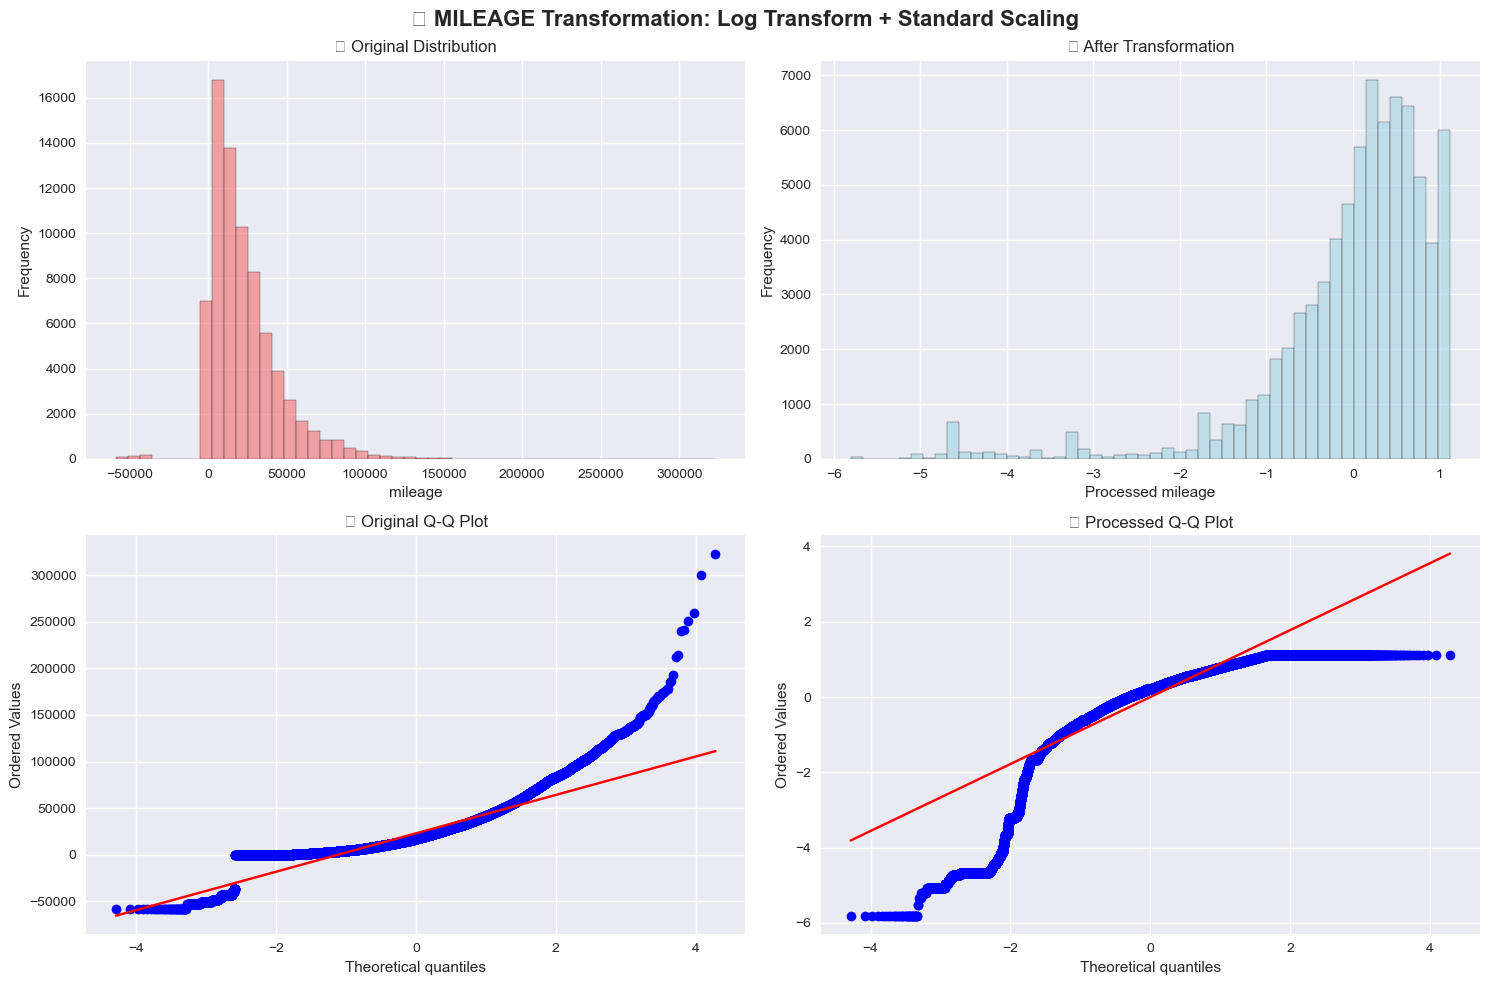

📊 Statistical Summary for mileage:


,Original,Processed,Change
count,74510.000,75973.000,1463.000
mean,23004.184,-0.000,-23004.184
std,22129.788,1.000,-22128.788
min,-58540.574,-5.804,58534.770
25%,7423.250,-0.320,-7423.570
50%,17300.000,0.208,-17299.792
75%,32427.500,0.616,-32426.884
max,323000.000,1.122,-322998.878


📈 Skewness: 1.555 → -2.357
📈 Kurtosis: 5.229 → 7.616


In [15]:
def visualize_feature_transformation(original_data, processed_data, feature_name, transformation_name):
    """Visualize before/after transformation"""
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'🔄 {feature_name.upper()} Transformation: {transformation_name}', 
                 fontsize=16, fontweight='bold')
    
    # Original distribution
    axes[0,0].hist(original_data.dropna(), bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[0,0].set_title('🔴 Original Distribution')
    axes[0,0].set_xlabel(feature_name)
    axes[0,0].set_ylabel('Frequency')
    
    # Processed distribution  
    axes[0,1].hist(processed_data.dropna(), bins=50, alpha=0.7, color='lightblue', edgecolor='black')
    axes[0,1].set_title('🔵 After Transformation')
    axes[0,1].set_xlabel(f'Processed {feature_name}')
    axes[0,1].set_ylabel('Frequency')
    
    # Q-Q plots for normality
    stats.probplot(original_data.dropna(), dist="norm", plot=axes[1,0])
    axes[1,0].set_title('🔴 Original Q-Q Plot')
    
    stats.probplot(processed_data.dropna(), dist="norm", plot=axes[1,1])
    axes[1,1].set_title('🔵 Processed Q-Q Plot')
    
    plt.tight_layout()
    plt.show()
    
    # Statistics comparison
    original_stats = original_data.describe()
    processed_stats = processed_data.describe()
    
    stats_comparison = pd.DataFrame({
        'Original': original_stats,
        'Processed': processed_stats,
        'Change': processed_stats - original_stats
    }).round(3)
    
    print(f"📊 Statistical Summary for {feature_name}:")
    display(stats_comparison)
    
    print(f"📈 Skewness: {original_data.skew():.3f} → {processed_data.skew():.3f}")
    print(f"📈 Kurtosis: {original_data.kurtosis():.3f} → {processed_data.kurtosis():.3f}")

# Visualize key transformations
print("🎨 TRANSFORMATION VISUALIZATIONS")
print("=" * 50)

# Mileage transformation
visualize_feature_transformation(
    train_data['mileage'], 
    X_train_advanced['mileage'],
    'mileage',
    'Log Transform + Standard Scaling'
)

In [16]:
# Analyze engineered features
print("⚙️ FEATURE ENGINEERING ANALYSIS")
print("=" * 50)

# Check which features were created
original_features = set(train_data.columns)
final_features = set(X_train_advanced.columns)
new_features = final_features - original_features
modified_features = final_features & original_features

print(f"🆕 New engineered features: {len(new_features)}")
for feature in sorted(new_features):
    print(f"   • {feature}")

print(f"\n🔄 Modified existing features: {len(modified_features)}")

# Analyze the engineered feature
if 'mileage_per_year' in X_train_advanced.columns:
    print(f"\n📊 MILEAGE PER YEAR ANALYSIS:")
    mpy_stats = X_train_advanced['mileage_per_year'].describe()
    display(mpy_stats)
    
    # Correlation with price
    if 'price' in train_data.columns:
        # Calculate correlation for original mileage_per_year before scaling
        temp_mpy = train_data['mileage'] / (2025 - train_data['year'] + 1)
        correlation = temp_mpy.corr(train_data['price'])
        print(f"🎯 Correlation with price: {correlation:.3f}")

# Encoding results
print(f"\n📝 CATEGORICAL ENCODING RESULTS:")
if hasattr(advanced_prepper, 'encoders'):
    for feature, encoder in advanced_prepper.encoders.items():
        if hasattr(encoder, 'get_feature_names_out'):
            encoded_features = encoder.get_feature_names_out()
            print(f"   • {feature} → {len(encoded_features)} features")
        else:
            print(f"   • {feature} → mean encoded")

# Check for any remaining data quality issues
print(f"\n✅ FINAL DATA QUALITY CHECK:")
print(f"   Missing values: {X_train_advanced.isnull().sum().sum()}")
print(f"   Infinite values: {np.isinf(X_train_advanced.select_dtypes(include=[np.number])).sum().sum()}")
print(f"   Data type consistency: ✅" if X_train_advanced.dtypes.apply(lambda x: x.kind in 'biufc').all() else "❌")

⚙️ FEATURE ENGINEERING ANALYSIS
🆕 New engineered features: 75
   • fuelType_DIESE
   • fuelType_DIESEL
   • fuelType_Diese
   • fuelType_Diesel
   • fuelType_ETRO
   • fuelType_ETROL
   • fuelType_Electric
   • fuelType_HYBRI
   • fuelType_HYBRID
   • fuelType_Hybri
   • fuelType_Hybrid
   • fuelType_IESE
   • fuelType_IESEL
   • fuelType_OTHER
   • fuelType_Othe
   • fuelType_Other
   • fuelType_PETRO
   • fuelType_PETROL
   • fuelType_Petro
   • fuelType_Petrol
   • fuelType_YBRID
   • fuelType_diese
   • fuelType_diesel
   • fuelType_etro
   • fuelType_etrol
   • fuelType_hybrid
   • fuelType_iese
   • fuelType_iesel
   • fuelType_other
   • fuelType_petro
   • fuelType_petrol
   • fuelType_ther
   • fuelType_ybri
   • fuelType_ybrid
   • mileage_per_year
   • transmission_ MANUAL 
   • transmission_ Manual
   • transmission_ Manual 
   • transmission_ manual 
   • transmission_ANUAL
   • transmission_AUTOMATI
   • transmission_AUTOMATIC
   • transmission_Automati
   • transmission_

count    7.304100e+04
mean    -3.225804e-16
std      1.000007e+00
min     -2.241917e+00
25%     -6.714274e-01
50%     -6.742570e-03
75%      6.486247e-01
max      1.238605e+01
Name: mileage_per_year, dtype: float64

🎯 Correlation with price: -0.340

📝 CATEGORICAL ENCODING RESULTS:

✅ FINAL DATA QUALITY CHECK:
   Missing values: 9071
   Infinite values: 0
❌
